In [9]:
from wdlen import wordlenth
import numpy as np
from nltk.corpus.reader import CHILDESCorpusReader
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import re

In [27]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Chinese/')
LWL = CHILDESCorpusReader(corpus_root, 'LeeWongLeung/.*.xml')
wdlen = wordlenth(LWL)

In [57]:
df = pd.DataFrame(wdlen).dropna()
df = df[['fname', 'age', 'one','two','three', 'four', 'five']]
df

,fname,age,one,two,three,four,five
0,LeeWongLeung/0extra/ccc11008.xml,22,115,111,26,11,3
1,LeeWongLeung/0extra/ccc11100.xml,23,32,65,26,11,5
2,LeeWongLeung/0extra/ccc20923.xml,34,211,178,185,97,70
3,LeeWongLeung/0extra/ccc21013.xml,34,142,229,203,126,169
4,LeeWongLeung/0extra/ccc21027.xml,35,108,231,212,126,110
5,LeeWongLeung/0extra/cgk11101.xml,23,135,118,83,31,8
6,LeeWongLeung/0extra/cgk11108.xml,23,84,86,41,15,3
7,LeeWongLeung/0extra/cgk20818.xml,33,141,119,96,80,133
8,LeeWongLeung/0extra/cgk20909.xml,33,175,136,106,76,104
9,LeeWongLeung/0extra/ckt10522.xml,18,13,1,1,0,0


In [5]:
writer = pd.ExcelWriter('LeeWongLeung.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

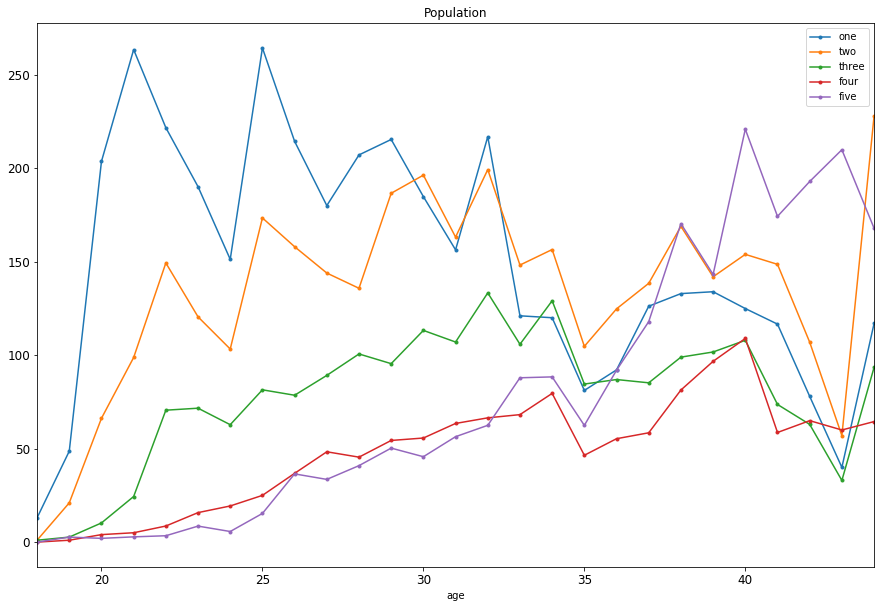

In [58]:
plt.figure()
df2 = df.groupby('age').mean().reset_index()
df2.set_index('age').plot.line(rot=0, style='.-', markevery=1, title='Population', figsize=(15,10), fontsize=12)
plt.show()

In [30]:
df['sum'] = df.loc[:, 'one':'five'].sum(axis = 1)
df

,fname,age,one,two,three,four,five,sum
0,LeeWongLeung/0extra/ccc11008.xml,22,115,111,26,11,3,266
1,LeeWongLeung/0extra/ccc11100.xml,23,32,65,26,11,5,139
2,LeeWongLeung/0extra/ccc20923.xml,34,211,178,185,97,70,741
3,LeeWongLeung/0extra/ccc21013.xml,34,142,229,203,126,169,869
4,LeeWongLeung/0extra/ccc21027.xml,35,108,231,212,126,110,787
5,LeeWongLeung/0extra/cgk11101.xml,23,135,118,83,31,8,375
6,LeeWongLeung/0extra/cgk11108.xml,23,84,86,41,15,3,229
7,LeeWongLeung/0extra/cgk20818.xml,33,141,119,96,80,133,569
8,LeeWongLeung/0extra/cgk20909.xml,33,175,136,106,76,104,597
9,LeeWongLeung/0extra/ckt10522.xml,18,13,1,1,0,0,15


In [31]:
df_per = df

In [32]:
df_per.loc[:, "one":"five"] = df.loc[:,"one":"five"].div(df["sum"], axis=0)
df_per

,fname,age,one,two,three,four,five,sum
0,LeeWongLeung/0extra/ccc11008.xml,22,0.432331,0.417293,0.097744,0.041353,0.011278,266
1,LeeWongLeung/0extra/ccc11100.xml,23,0.230216,0.467626,0.187050,0.079137,0.035971,139
2,LeeWongLeung/0extra/ccc20923.xml,34,0.284750,0.240216,0.249663,0.130904,0.094467,741
3,LeeWongLeung/0extra/ccc21013.xml,34,0.163406,0.263521,0.233602,0.144994,0.194476,869
4,LeeWongLeung/0extra/ccc21027.xml,35,0.137230,0.293520,0.269377,0.160102,0.139771,787
5,LeeWongLeung/0extra/cgk11101.xml,23,0.360000,0.314667,0.221333,0.082667,0.021333,375
6,LeeWongLeung/0extra/cgk11108.xml,23,0.366812,0.375546,0.179039,0.065502,0.013100,229
7,LeeWongLeung/0extra/cgk20818.xml,33,0.247803,0.209139,0.168717,0.140598,0.233743,569
8,LeeWongLeung/0extra/cgk20909.xml,33,0.293132,0.227806,0.177554,0.127303,0.174204,597
9,LeeWongLeung/0extra/ckt10522.xml,18,0.866667,0.066667,0.066667,0.000000,0.000000,15


In [33]:
df_per = df_per.drop(['sum'], axis = 1)

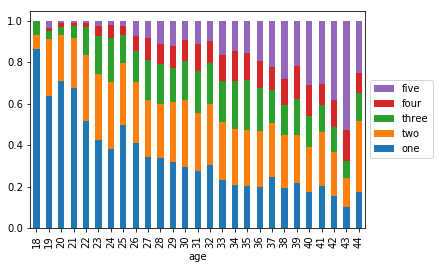

In [42]:
ax = df_per.groupby('age').mean().plot.bar(stacked = True, legend = True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## without one-word utterances

In [49]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Chinese/')
LWL = CHILDESCorpusReader(corpus_root, 'LeeWongLeung/.*.xml')
wdlen_list = wdlen.wdlen_no1(LWL)

AttributeError: 'list' object has no attribute 'wdlen_no1'

In [45]:
df_no1 = pd.DataFrame(wdlen).dropna()
df_no1 = df_no1[['fname', 'age', 'two','three', 'four', 'five']]
df_no1

,fname,age,two,three,four,five
0,LeeWongLeung/0extra/ccc11008.xml,22,111,26,11,3
1,LeeWongLeung/0extra/ccc11100.xml,23,65,26,11,5
2,LeeWongLeung/0extra/ccc20923.xml,34,178,185,97,70
3,LeeWongLeung/0extra/ccc21013.xml,34,229,203,126,169
4,LeeWongLeung/0extra/ccc21027.xml,35,231,212,126,110
5,LeeWongLeung/0extra/cgk11101.xml,23,118,83,31,8
6,LeeWongLeung/0extra/cgk11108.xml,23,86,41,15,3
7,LeeWongLeung/0extra/cgk20818.xml,33,119,96,80,133
8,LeeWongLeung/0extra/cgk20909.xml,33,136,106,76,104
9,LeeWongLeung/0extra/ckt10522.xml,18,1,1,0,0


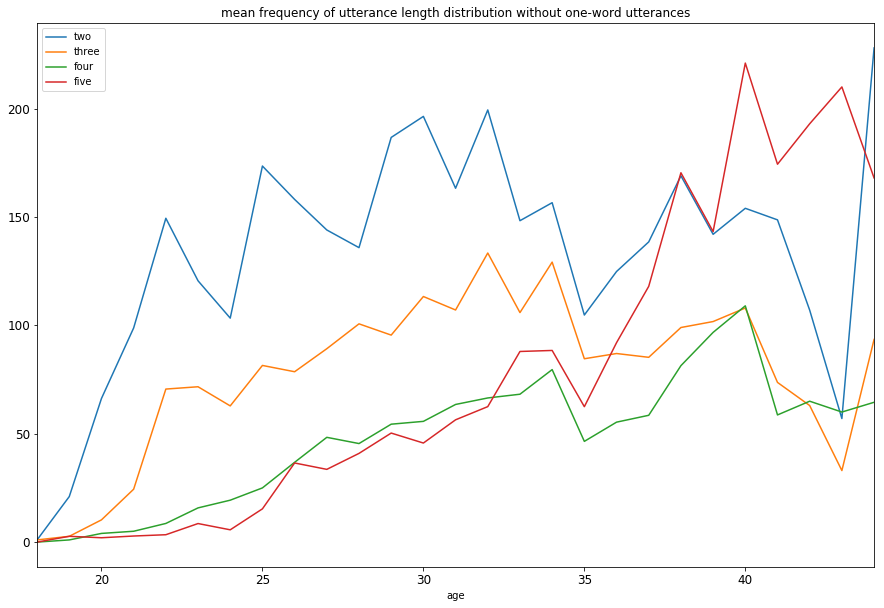

In [20]:
plt.figure()
df2_no1 = df_no1.groupby('age').mean().reset_index()
df2_no1.set_index('age').plot.line(rot=0, title='mean frequency of utterance length distribution without one-word utterances', figsize=(15,10), fontsize=12)
plt.show()

In [50]:
df_no1["sum"] = df_no1.loc[:, 'two':'five'].sum(axis=1)
df_no1

,fname,age,two,three,four,five,sum
0,LeeWongLeung/0extra/ccc11008.xml,22,111,26,11,3,151
1,LeeWongLeung/0extra/ccc11100.xml,23,65,26,11,5,107
2,LeeWongLeung/0extra/ccc20923.xml,34,178,185,97,70,530
3,LeeWongLeung/0extra/ccc21013.xml,34,229,203,126,169,727
4,LeeWongLeung/0extra/ccc21027.xml,35,231,212,126,110,679
5,LeeWongLeung/0extra/cgk11101.xml,23,118,83,31,8,240
6,LeeWongLeung/0extra/cgk11108.xml,23,86,41,15,3,145
7,LeeWongLeung/0extra/cgk20818.xml,33,119,96,80,133,428
8,LeeWongLeung/0extra/cgk20909.xml,33,136,106,76,104,422
9,LeeWongLeung/0extra/ckt10522.xml,18,1,1,0,0,2


In [51]:
df_perno1 = df_no1
df_perno1.loc[:, 'two':'five'] = df_no1.loc[:,"two":"five"].div(df_no1["sum"], axis=0)
df_perno1

,fname,age,two,three,four,five,sum
0,LeeWongLeung/0extra/ccc11008.xml,22,0.735099,0.172185,0.072848,0.019868,151
1,LeeWongLeung/0extra/ccc11100.xml,23,0.607477,0.242991,0.102804,0.046729,107
2,LeeWongLeung/0extra/ccc20923.xml,34,0.335849,0.349057,0.183019,0.132075,530
3,LeeWongLeung/0extra/ccc21013.xml,34,0.314993,0.279230,0.173315,0.232462,727
4,LeeWongLeung/0extra/ccc21027.xml,35,0.340206,0.312224,0.185567,0.162003,679
5,LeeWongLeung/0extra/cgk11101.xml,23,0.491667,0.345833,0.129167,0.033333,240
6,LeeWongLeung/0extra/cgk11108.xml,23,0.593103,0.282759,0.103448,0.020690,145
7,LeeWongLeung/0extra/cgk20818.xml,33,0.278037,0.224299,0.186916,0.310748,428
8,LeeWongLeung/0extra/cgk20909.xml,33,0.322275,0.251185,0.180095,0.246445,422
9,LeeWongLeung/0extra/ckt10522.xml,18,0.500000,0.500000,0.000000,0.000000,2


In [52]:
df_perno1 = df_perno1.drop(['sum'], axis = 1)

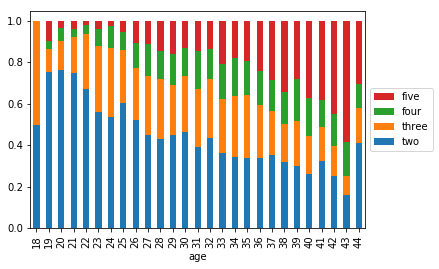

In [53]:
ax = df_perno1.groupby('age').mean().plot.bar(stacked = True, legend = 'reverse')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## After coelescing some of those ages

In [2]:
df = pd.read_excel('LeeWongLeung.xlsx')
df_age = df.drop(['age'], axis = 1)
df_com = df.drop(['age.1'], axis = 1)

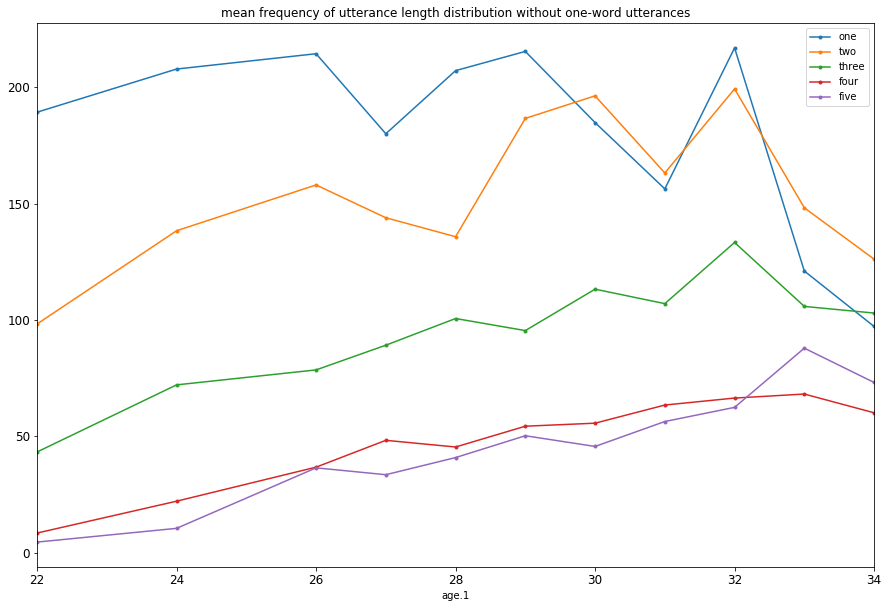

In [45]:
plt.figure()
df2_age = df_age.groupby('age.1').mean().reset_index()
df2_age.set_index('age.1').plot.line(rot=0, title='mean frequency of utterance length distribution after coelescing ages', style='.-', markevery=1, figsize=(15,10), fontsize=12)
plt.show()

In [99]:
df3_age = df_age.groupby('age.1').count()
df2_com = df_com.groupby('age').count()

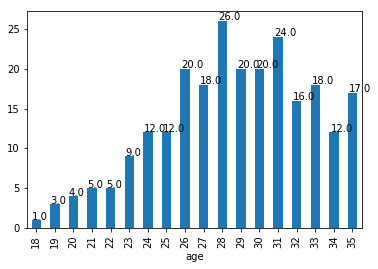

In [58]:
# Before coelescing ages
ax = df2_com['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

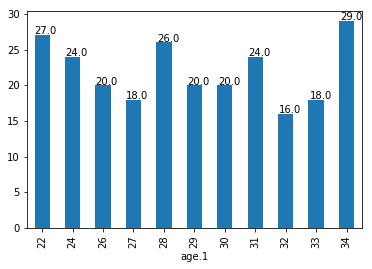

In [59]:
# After coelescing ages
ax = df3_age['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [3]:
df_age['sum'] = df_age.loc[:, 'one':'five'].sum(axis = 1)
df_age

,fname,age.1,one,two,three,four,five,sum
0,LeeWongLeung/0extra/ckt10522.xml,22,13,1,1,0,0,15
1,LeeWongLeung/0extra/ckt10703.xml,22,36,20,3,2,3,64
2,LeeWongLeung/0extra/ckt10710.xml,22,56,29,1,0,3,89
3,LeeWongLeung/0extra/mhz10700.xml,22,54,14,4,1,2,75
4,LeeWongLeung/0extra/ckt10800.xml,22,310,95,13,0,1,419
5,LeeWongLeung/0extra/ckt10807.xml,22,263,99,10,3,3,378
6,LeeWongLeung/0extra/mhz10800.xml,22,125,46,11,9,1,192
7,LeeWongLeung/0extra/mhz10814.xml,22,117,25,7,4,3,156
8,LeeWongLeung/0extra/ckt10821.xml,22,342,136,36,3,2,519
9,LeeWongLeung/0extra/ckt10907.xml,22,383,164,49,8,1,605


In [4]:
df_perage = df_age
df_perage.loc[:, 'one':'five'] = df_age.loc[:, 'one':'five'].div(df_age['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

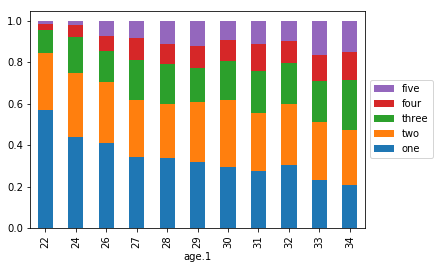

In [54]:
ax = df_perage.groupby('age.1').mean().plot.bar(legend = 'reverse', stacked = True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Without one-word utterances

In [3]:
df = pd.read_excel('LeeWongLeung.xlsx')
df_ageno1 = df.drop(['age'], axis = 1)
df_ageno1 = df_ageno1.drop(['one'], axis = 1)

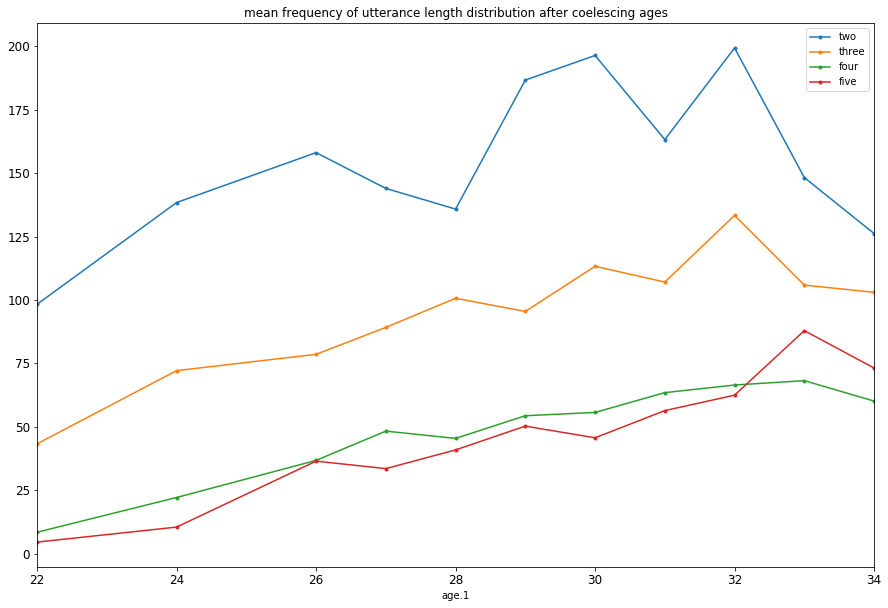

In [12]:
plt.figure()
df2_ageno1 = df_ageno1.groupby('age.1').mean().reset_index()
df2_ageno1.set_index('age.1').plot.line(rot=0, title='mean frequency of utterance length distribution after coelescing ages', style='.-', markevery=1, figsize=(15,10), fontsize=12)
plt.show()

In [4]:
df_ageno1['sum'] = df_ageno1.loc[:, 'two':'five'].sum(axis = 1)

In [5]:
df_perageno1 = df_ageno1
df_perageno1.loc[:, 'two':'five'] = df_ageno1.loc[:, 'two':'five'].div(df_ageno1['sum'], axis = 0)
df_perageno1 = df_perageno1.drop(['sum'], axis = 1)

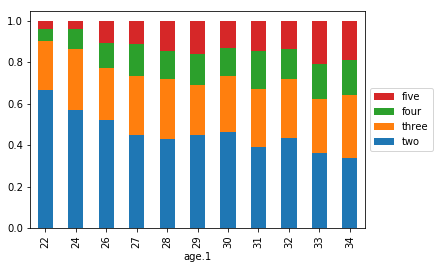

In [55]:
ax = df_perageno1.groupby('age.1').mean().plot.bar(stacked = True, legend = 'reverse')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## plot per child

In [6]:
def per_child(df, name, group):
    ax = df.loc[df['corpus'] == name].groupby(group).mean().plot.bar(stacked = True, legend = True, title = name)
    handles, labels= ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

### Without one-word utterances but with the adjustment on ages

In [7]:
df_perageno1['corpus'] = df_perageno1.fname.str[0:-10]

In [17]:
df_perageno1['corpus'] = df_perageno1['fname'].str.replace('0extra/', '')

In [19]:
df_perageno1['corpus'] = df_perageno1.corpus.str[13:16]

In [21]:
children = df_perageno1.corpus.unique()

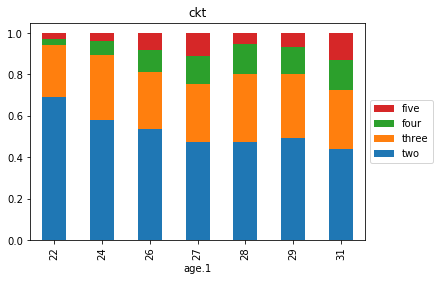

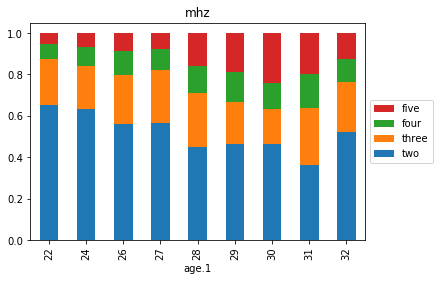

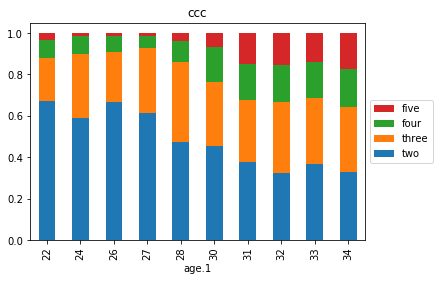

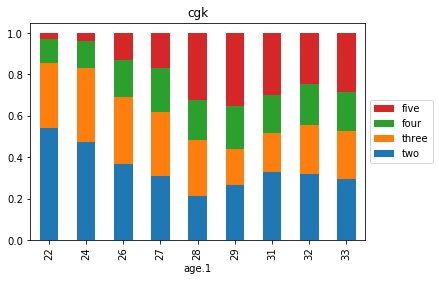

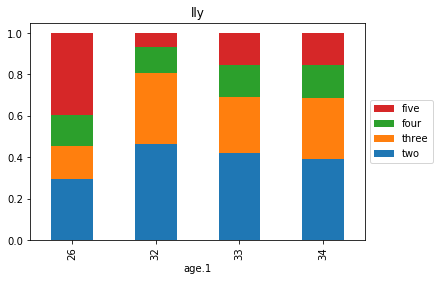

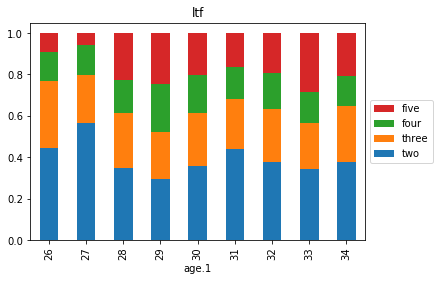

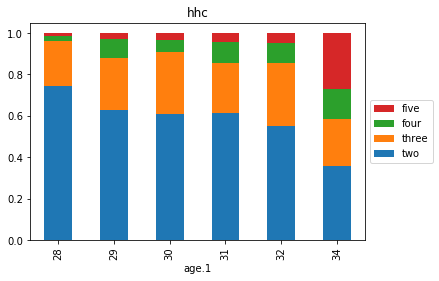

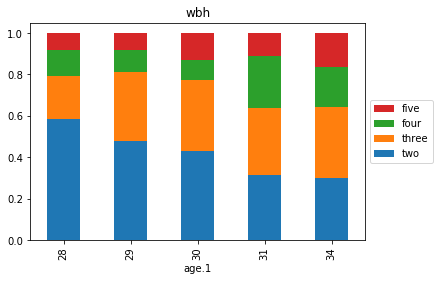

In [22]:
for child in children:   #  can't read Tai's data??
    per_child(df_perageno1, child, 'age.1')